In [93]:
# Problem Definition:
# The goal of this project is to predict medical insurance charges
# based on features like age, sex, BMI, children, smoker, and region.

In [94]:
# Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [95]:
# Step 3: Load Dataset

df = pd.read_csv("insurance.csv")

# Show first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [96]:
#data checking
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())


(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    3

In [97]:
#step 4:Data Cleaning

df.isnull().sum() #to check wether the data is in null 



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

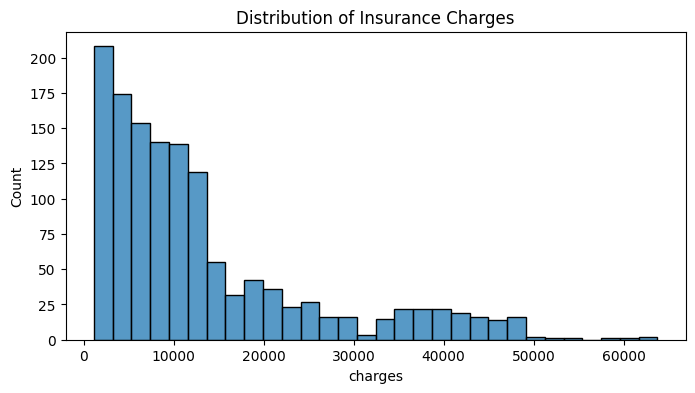

In [98]:
#Step 5: Exploratory Data Analysis (EDA)

plt.figure(figsize=(8,4))
sns.histplot(df["charges"])
plt.title("Distribution of Insurance Charges")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

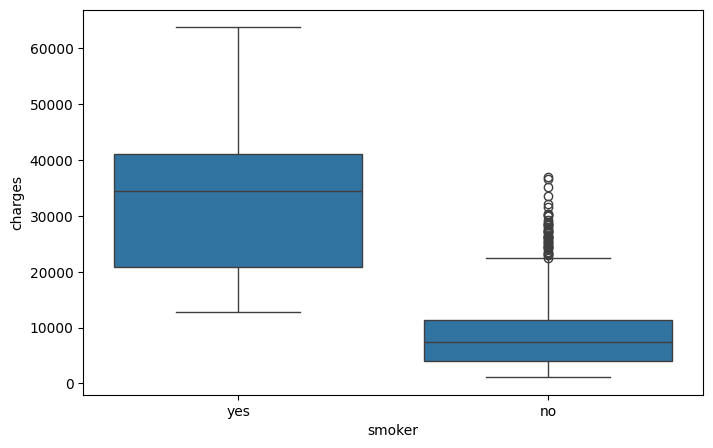

In [99]:
plt.figure(figsize=(8,5))
sns.boxplot(x="smoker",y="charges", data=df)
plt.show



#notes: Smokers (yes)          Non-smokers (no)                Dots above box = outliers

#Minimum ≈ 13000                Minimum ≈ 1000                 These are people paying unusually high charges.
#Maximum ≈ 64000                Maximum ≈ 37000
#Median ≈ 35000                 Median ≈ 7000

# Observation:
# Smokers have significantly higher insurance charges compared to non-smokers.
# This indicates that smoking is a major factor affecting insurance cost.
# Insurance companies charge smokers more due to higher health risks.

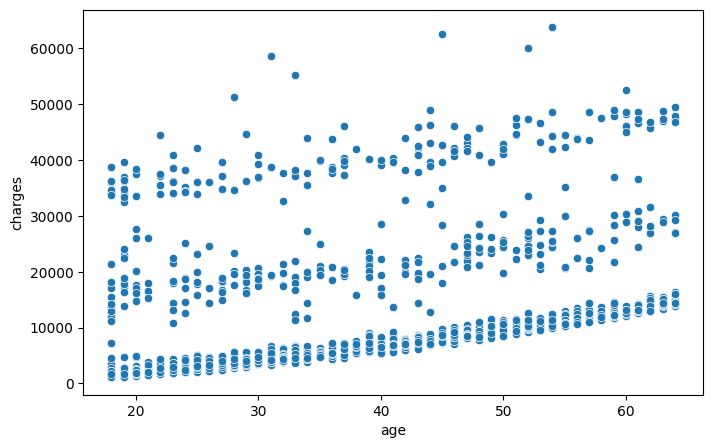

In [100]:
plt.figure(figsize=(8,5))

sns.scatterplot(x="age", y="charges", data=df)

plt.show()

# Observation:
# There is a positive relationship between age and insurance charges.
# As age increases, the insurance cost generally increases.
# Older individuals tend to have higher medical expenses, resulting in higher insurance charges.
# The graph also shows higher charge clusters, likely corresponding to smokers.

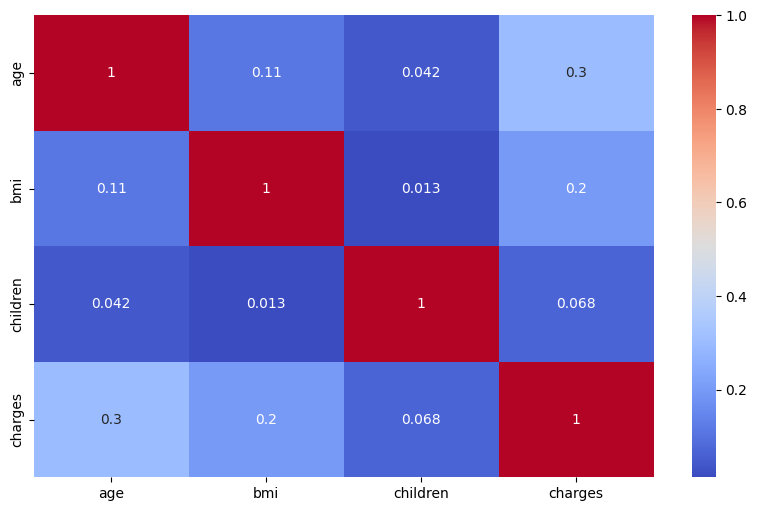

In [101]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

# Observation:
# Age has the highest correlation with charges (0.30),
# followed by BMI (0.20), and children (0.068).
# This indicates age is the most important numerical feature
# affecting insurance charges.

In [102]:
#Step 6: Feature Encoding

#Step 6.1: Check categorical columns
df.select_dtypes(include=object).columns

#Step 6.2: Apply Encoding

df_encoded = pd.get_dummies(df,drop_first=True) # converts categorial into true and false
df_encoded = df_encoded.astype(int) # converts true or false into 0 and 1

df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [103]:
#step 7 : model traning 

#feature(x)
x = df_encoded.drop("charges",axis=1)
#target(y)
y = df_encoded["charges"]
# Split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# charges is dropped from X because it is the value we want to predict

model = LinearRegression()#importing model

# fit() trains the Linear Regression model
# It learns relationship between input features and target variable
model.fit(X_train,y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [104]:
#step 8 : model prediction

# predict() uses trained model to predict charges
y_pred = model.predict(X_test)

In [105]:
#step 9 : model evaluation

# MAE
mae = mean_absolute_error(y_test, y_pred)

# MSE
mse = mean_squared_error(y_test, y_pred)

# RMSE
rmse = mse ** 0.5

# R2 Score
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# Model Evaluation Conclusion:

# The Linear Regression model achieved:

# MAE: 4176
# RMSE: 5793
# R2 Score: 0.78

# This means the model explains 78% of the variance in insurance charges.

# The model performs well and can predict insurance costs with good accuracy.

MAE: 4176.2683952992575
MSE: 33566439.73530043
RMSE: 5793.655127404498
R2 Score: 0.7837888448800692


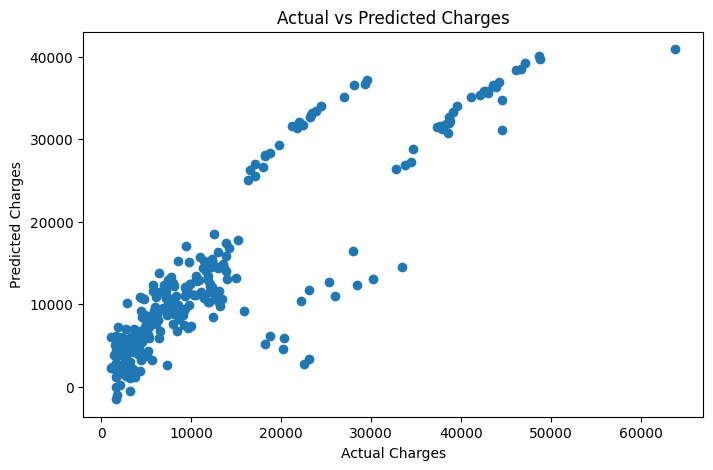

In [106]:
#step 10 : Visualization

plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Charges")

plt.ylabel("Predicted Charges")

plt.title("Actual vs Predicted Charges")
plt.show()

In [107]:
#frontend integeration
import pickle

# save model
pickle.dump(model, open("insurance_model.pkl", "wb"))

In [108]:
x.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')